In [55]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn. feature_extraction. text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [56]:
# data analise :
# extract
# بارگذاری داده‌ها
org_df = pd.read_csv("titanic (1).csv")

df = org_df[["Survived","Pclass","Sex","Age","SibSp","Parch","Cabin"]].copy()

# cleaning
# داده خالی هر ستون
missing_values = df.isnull().sum()
print(missing_values)

# جابگزینی داده خالی با nan
df["Cabin"] = df["Cabin"].fillna(0)

#جایگزاری داده های خالی با میانه سن
df["Age"] = df["Age"].fillna(df["Age"].median())

print(df)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64
     Survived  Pclass     Sex   Age  SibSp  Parch Cabin
0           0       3    male  22.0      1      0     0
1           1       1  female  38.0      1      0   C85
2           1       3  female  26.0      0      0     0
3           1       1  female  35.0      1      0  C123
4           0       3    male  35.0      0      0     0
..        ...     ...     ...   ...    ...    ...   ...
886         0       2    male  27.0      0      0     0
887         1       1  female  19.0      0      0   B42
888         0       3  female  28.0      1      2     0
889         1       1    male  26.0      0      0  C148
890         0       3    male  32.0      0      0     0

[891 rows x 7 columns]


In [57]:
#  ساخت feature ترکیبی متنی
df["Mix_feature"] = (df["Survived"].astype(str) + "_" +
                     df["Pclass"].astype(str) + "_" +
                     df["Sex"].astype(str) + "_" +
                     df["Age"].astype(str) + "_" +
                     df["SibSp"].astype(str) + "_" +
                     df["Parch"].astype(str)
                     )

#  تبدیل متون به بردار
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(df["Mix_feature"])

#  محاسبه شباهت cosine بین همه نمونه‌ها
similarities = cosine_similarity(vector)

# حذف داده مشابه
to_drop = set()


for i in range(similarities.shape[0]):
    if i in to_drop:
        continue
    for j in range(i+1, similarities.shape[1]):
        if similarities[i, j] > 0.9:
            to_drop.add(j)

#  حذف نمونه‌های مشابه
df_clean = df.drop(index=df.index[list(to_drop)])

print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch Cabin          Mix_feature
0           0       3    male  22.0      1      0     0    0_3_male_22.0_1_0
1           1       1  female  38.0      1      0   C85  1_1_female_38.0_1_0
2           1       3  female  26.0      0      0     0  1_3_female_26.0_0_0
3           1       1  female  35.0      1      0  C123  1_1_female_35.0_1_0
4           0       3    male  35.0      0      0     0    0_3_male_35.0_0_0
..        ...     ...     ...   ...    ...    ...   ...                  ...
886         0       2    male  27.0      0      0     0    0_2_male_27.0_0_0
887         1       1  female  19.0      0      0   B42  1_1_female_19.0_0_0
888         0       3  female  28.0      1      2     0  0_3_female_28.0_1_2
889         1       1    male  26.0      0      0  C148    1_1_male_26.0_0_0
890         0       3    male  32.0      0      0     0    0_3_male_32.0_0_0

[891 rows x 8 columns]


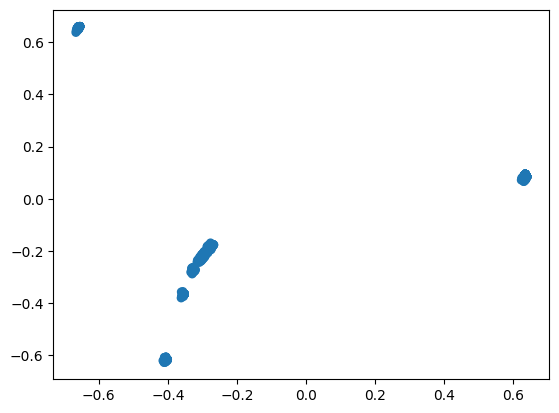

In [58]:

# داده‌ی برداری‌شده بعد از حذف نمونه‌های خیلی شبیه
vector_cleaned = vector[df_clean.index]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(vector_cleaned.toarray())

# خوشه‌بندی با HDBSCAN
cluster = HDBSCAN()
pred = cluster.fit_predict(vector_cleaned)


# نمودار hbdscan
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred, cmap="tab10", s=30)


In [62]:
X = vector_cleaned
y = df_clean["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# ارزیابی
acc = accuracy_score(y_test, y_pred)
print(acc)

print(classification_report(y_test, y_pred, target_names=["مرده", "زنده"]))


0.6923076923076923
              precision    recall  f1-score   support

        مرده       0.63      0.86      0.72        49
        زنده       0.81      0.55      0.65        55

    accuracy                           0.69       104
   macro avg       0.72      0.70      0.69       104
weighted avg       0.72      0.69      0.69       104

